# Testing out a random number generator

Here are performed a number of tests to verify the reliability of a linear congruential random number generator: we give estimates for the mean and the variance of the sampled distribution, and try to get a sense of how well it resembles a uniform continuous distribution with the $\chi^2$ test. After that, a hands-on feeling of the central limit theorem is given, by seeing how the sample mean for various distributions (being itself a **random variable**) is distributed, varying the number of samples. Finally, results for the Buffon's needle experiment are presented

In [1]:
from array import array
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import math

M = 100000         
N = 100                 
L = int(M/N)
x = np.arange(N) + 1

In [2]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [3]:
def read(file, single=0):
    mat = []
    with open(file) as f:
        data = f.readlines()
    for line in data:
        s = line.split()
        if s[0].replace('.', '', 1).isdigit(): 
            mat.append(s)
    if single == 0:
        measure = np.asarray(column(mat,0), dtype=np.float64)
        errors = np.asarray(column(mat,1), dtype=np.float64)
        return measure, errors
    elif single == 1:
        measure = np.asarray(column(mat,0), dtype=np.float64)
        return measure
    elif single == 3:
        first_col = np.asarray(column(mat,0), dtype=np.float64)
        second_col = np.asarray(column(mat,1), dtype=np.float64)
        third_col = np.asarray(column(mat,2), dtype=np.float64)
        return first_col, second_col, third_col

## Preliminary tests

### Mean

The expected value for the **mean** of a uniform distribution with extremes $0$ and $1$ is $0.5$. More formally, it is defined as the first moment of the distribution:\
\
$$
\mu = \int_{-\infty}^{+\infty} f(r) r dr = 0.5
$$
\
\
where $f(r)$ is equal to $1$ in the interval $[0,1]$ and $0$ elsewhere.\
\
In this sub-section we compare the value of the sample mean of an increasing number of stochastic variables as an estimator for the mean of the distribution.
In order to produce sensible variables, i.e. independent and identically distributed (i.i.e.), on which uncertainties can therefore be calculated with the central limt theorem, we need our variables to be as uncorrelated as possible. For this purpose, data blocking is implemented in the code and uncertainties on the values obtained are calculated with the usual formula

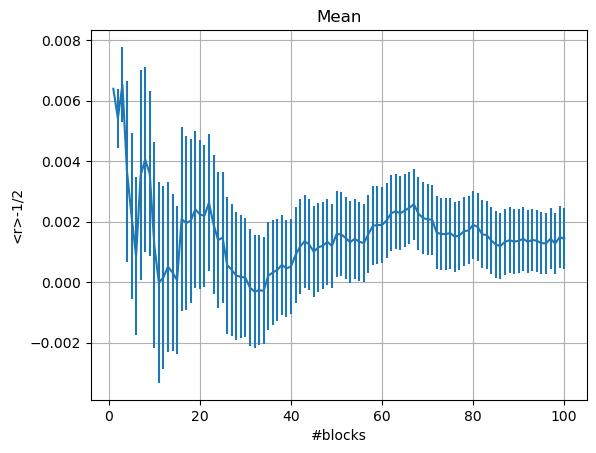

In [4]:
res = read('OUTPUT/MedieRNG.dat')
plt.errorbar(x, res[0]-0.5,yerr=res[1])
plt.xlabel('#blocks')
plt.ylabel('<r>-1/2')
plt.grid()
plt.title('Mean')
plt.show()

### Variance

**Variance** is defined as the second central moment of the distribution:\
\
$$
\sigma^2 = \int_{-\infty}^{+\infty}f(r) (r-0.5)^2 dr = \frac{1}{12}
$$
\
Each stochastic variable in the code is computed as the sample mean in a block of\
$$
(r^* - \mu )^2
$$
\
where $r^*$ is sampled to our uniform distribution and $\mu = 0.5$. Statistical uncertainties are computed as before

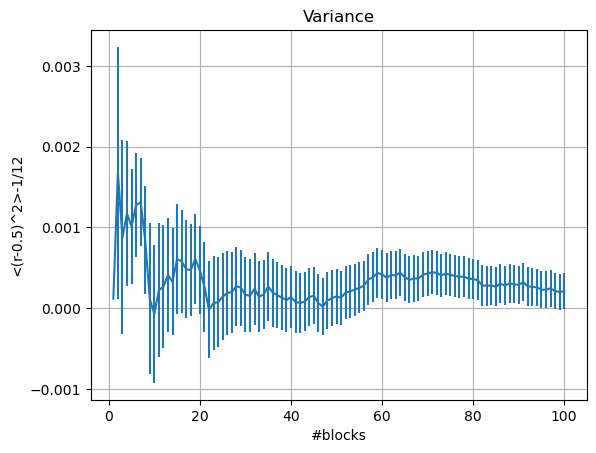

In [5]:
res = read('OUTPUT/VarianzeRNG.dat')
plt.errorbar(x, res[0]-1/12,yerr=res[1])
plt.xlabel('#blocks')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid()
plt.title('Variance')
plt.show()

### Chi2 test

The aim of this test is verifying that not only that the parameters of the sampled distribution are correct, but that we are in fact sampling a uniform distribution. In more precise terms, we are estimating the probability that the samples are **not** extracted from a uniform distribution.\
To do so, we divide the interval $[0,1)$ into sub-intervals: the number of samples falling in each sub-interval is expected to be distributed according to a binomial distribution (it's either in or out) where the probability is proportional to the inverse of the number of intervals. We can there fore use, with a large number of extractions, the approximation\
\
$$
\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}
$$
\
where $M$ is the number of sub-intervals, $n_i$ is the number of counts in the $i-th$ bin, and $n$ is the total number of throws.\
\
Here it is shown that the values for the Chi2 attest themselves around the expected value, with few outliers

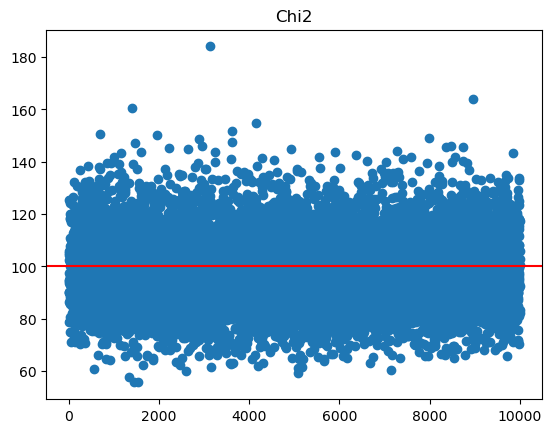

In [6]:
res = read('OUTPUT/Chi2.dat', 1)
x = np.arange(10000)+1
plt.scatter(x, res)
plt.axhline(y = 100, color = 'r', linestyle = '-') 
plt.title('Chi2')
plt.show()

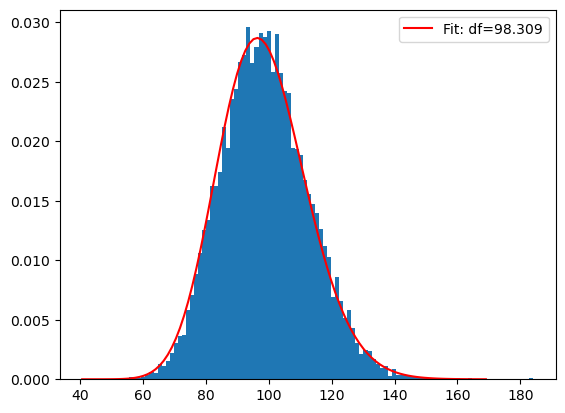

In [7]:
n_bins = 100
hist, hist_bins = np.histogram(res, bins=n_bins, density=True)
popt = curve_fit(chi2.pdf, hist_bins[:-1], hist, p0=100)[0]
x_chi2 = np.linspace(np.min(hist_bins) - 15, np.max(hist_bins) - 15, 100)

plt.hist(res, bins=hist_bins, density=True)
plt.plot(x_chi2, chi2.pdf(x_chi2, *popt), 'r-', label='Fit: df=%5.3f' % tuple(popt))
plt.legend()
plt.show()

The parameter extrapolated from the fit for the degrees of freedom ($98.3$) is in pretty good accordance with what we expect ($100$)

## Central limit theorem

Our aim is to show how the central limit theorem guarantees that, for certain distributions, the sample mean is normally distributed. We consider the cases of the uniform distribution and the exponential distribution, and the Cauchy distribution as an example of a distribution that does not exhibit this behavior.\
\
The sample mean in calculated for $1$, $2$, $10$, $100$ points, from which we can observe that with bigger and bigger samples its distribution approaches a gaussian in the relevant cases\
The distributions are going to be sampled with the inverse cumulative function method

In [8]:
n_samp = [1, 2, 10, 100]

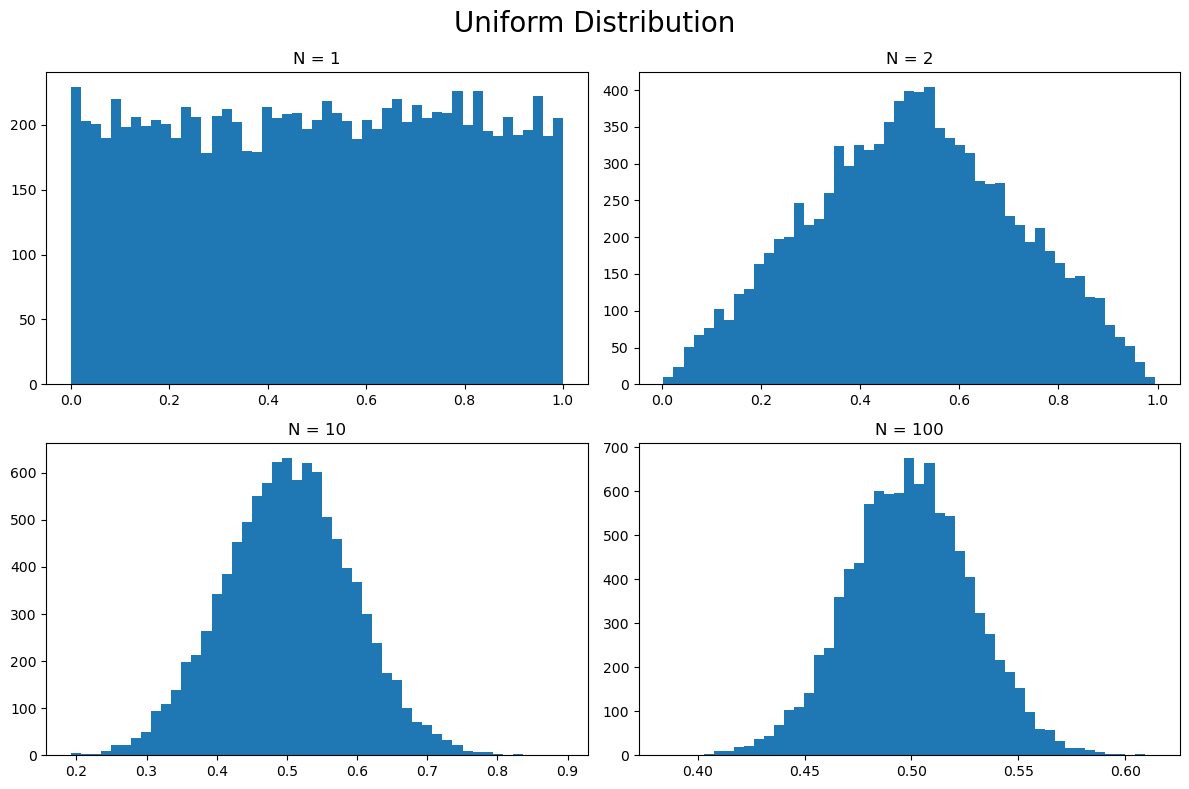

In [9]:
j = 1
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Uniform Distribution', fontsize=20)
for i in n_samp:
    res = read('OUTPUT/Histograms' + str(i) + '.dat', 3)
    plt.subplot(2, 2, j)
    plt.hist(res[0], bins = np.linspace(min(res[0]),max(res[0])))
    plt.title("N = " + str(n_samp[j-1]))
    j += 1
fig.tight_layout()
plt.show()

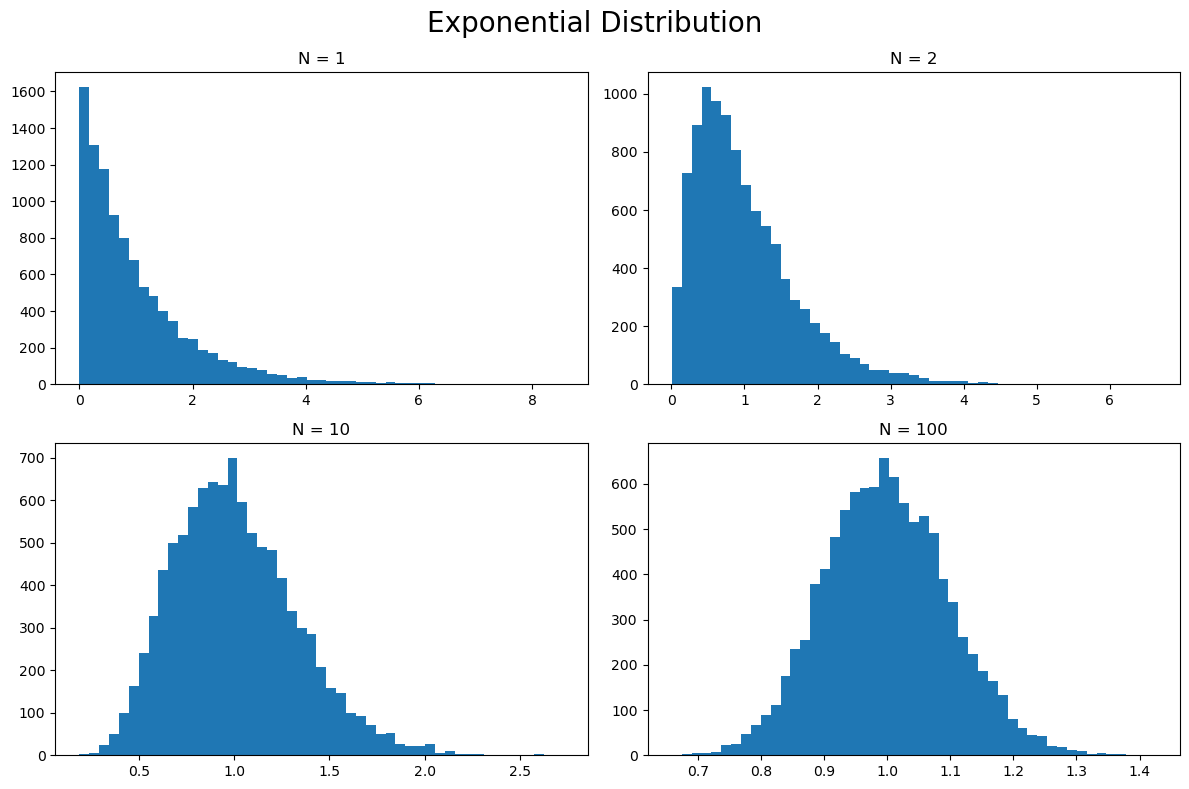

In [10]:
j = 1
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Exponential Distribution', fontsize=20)
for i in n_samp:
    res = read('OUTPUT/Histograms' + str(i) + '.dat', 3)
    plt.subplot(2, 2, j)
    plt.hist(res[1], bins = np.linspace(min(res[1]),max(res[1])))
    plt.title("N = " + str(n_samp[j-1]))
    j += 1
fig.tight_layout()
plt.show()

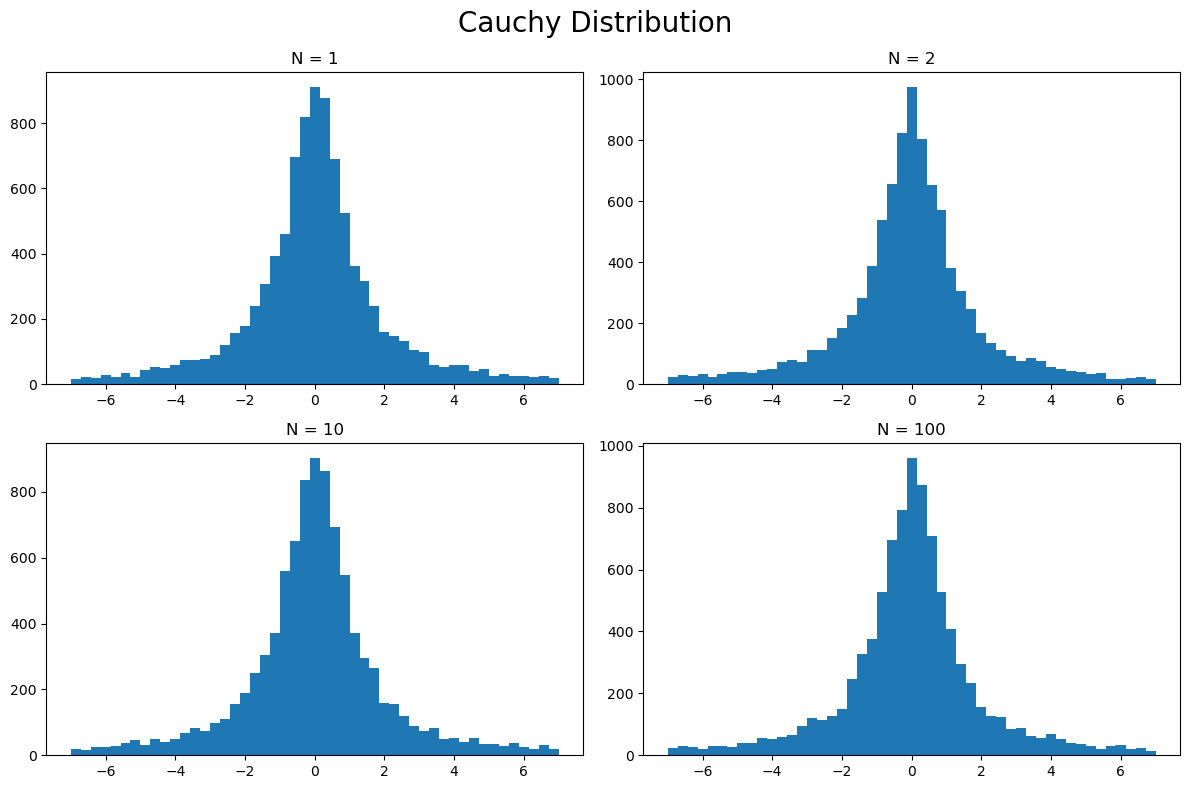

In [11]:
j = 1
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Cauchy Distribution', fontsize=20)
for i in n_samp:
    res = read('OUTPUT/Histograms' + str(i) + '.dat', 3)
    plt.subplot(2, 2, j)
    plt.hist(res[2], bins = np.linspace(-7, 7))
    plt.title("N = " + str(n_samp[j-1]))
    j += 1
fig.tight_layout()
plt.show()

## Buffon's needle

One can estimate the value of $\pi$ by simulating Buffon's experiment:\
\
$$\pi = \lim_{N \to \infty}\frac{2LN}{N_{hit}d}$$
\
where $d$ is the spacing between the lines and $L$ is the length of the needle. In the code the two are merged into a single parameter, as if the length of the needle is a natural unit.

The results are obtained by sampling an angle in the interval $[0, 2\pi)$, to simulate the orientation in which the needle lands, while another random variable, extracted uniformly in $[0, d)$ represents the position of the center of the needle. In the calculations everyting is projected in one dimension (the one transverse to the lines) and is periodic, therefore only the interval between $0$ and $d$ matters.
If the projection on the y-axis of the needle, vectorially summed to the position of its center, exceeds the spacing of the lines, it means that it has crossed, and a hit is marked

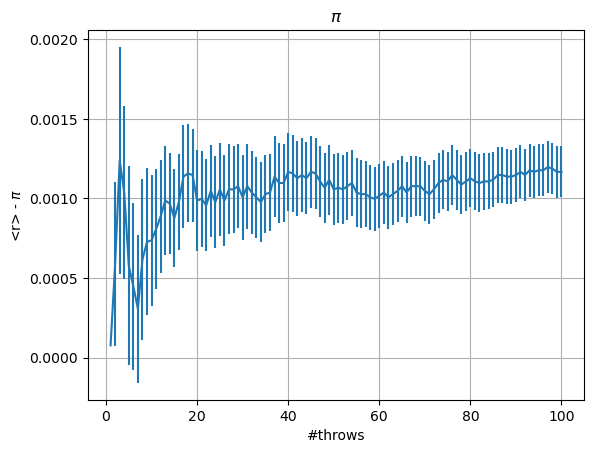

In [12]:
res = read('OUTPUT/Buffon.dat')
x = np.arange(N) + 1
plt.errorbar(x, res[0] - math.pi, yerr=res[1])
plt.xlabel('#throws')
plt.ylabel('<r> - $\pi$')
plt.grid()
plt.title("$\pi$")
plt.show()